# Quão bom é o seu modelo?

# Métricas de Classificação
- Medindo performance do modelo com Acurácia
    - É apenas uma fração das amostras corretamente classificadas
    - Não é sempre uma métrica útil

# Exemplo de clasificação não balanceada (muito mais elementos de uma determinada classe que de outras): Emails
- Classificação de Spam
    - 99% dos emails são reais, 1% dos emails são Spam
- Poderia criar um classificador que prediz que todos os emails são reais
    - 99% de acurácia
    - Mas horrível na verdade em classificar spam
    - Falha no seu propósito original
- Necessita de métricas mais diferenciadas (nuanced)

# Analisando predições de classificações

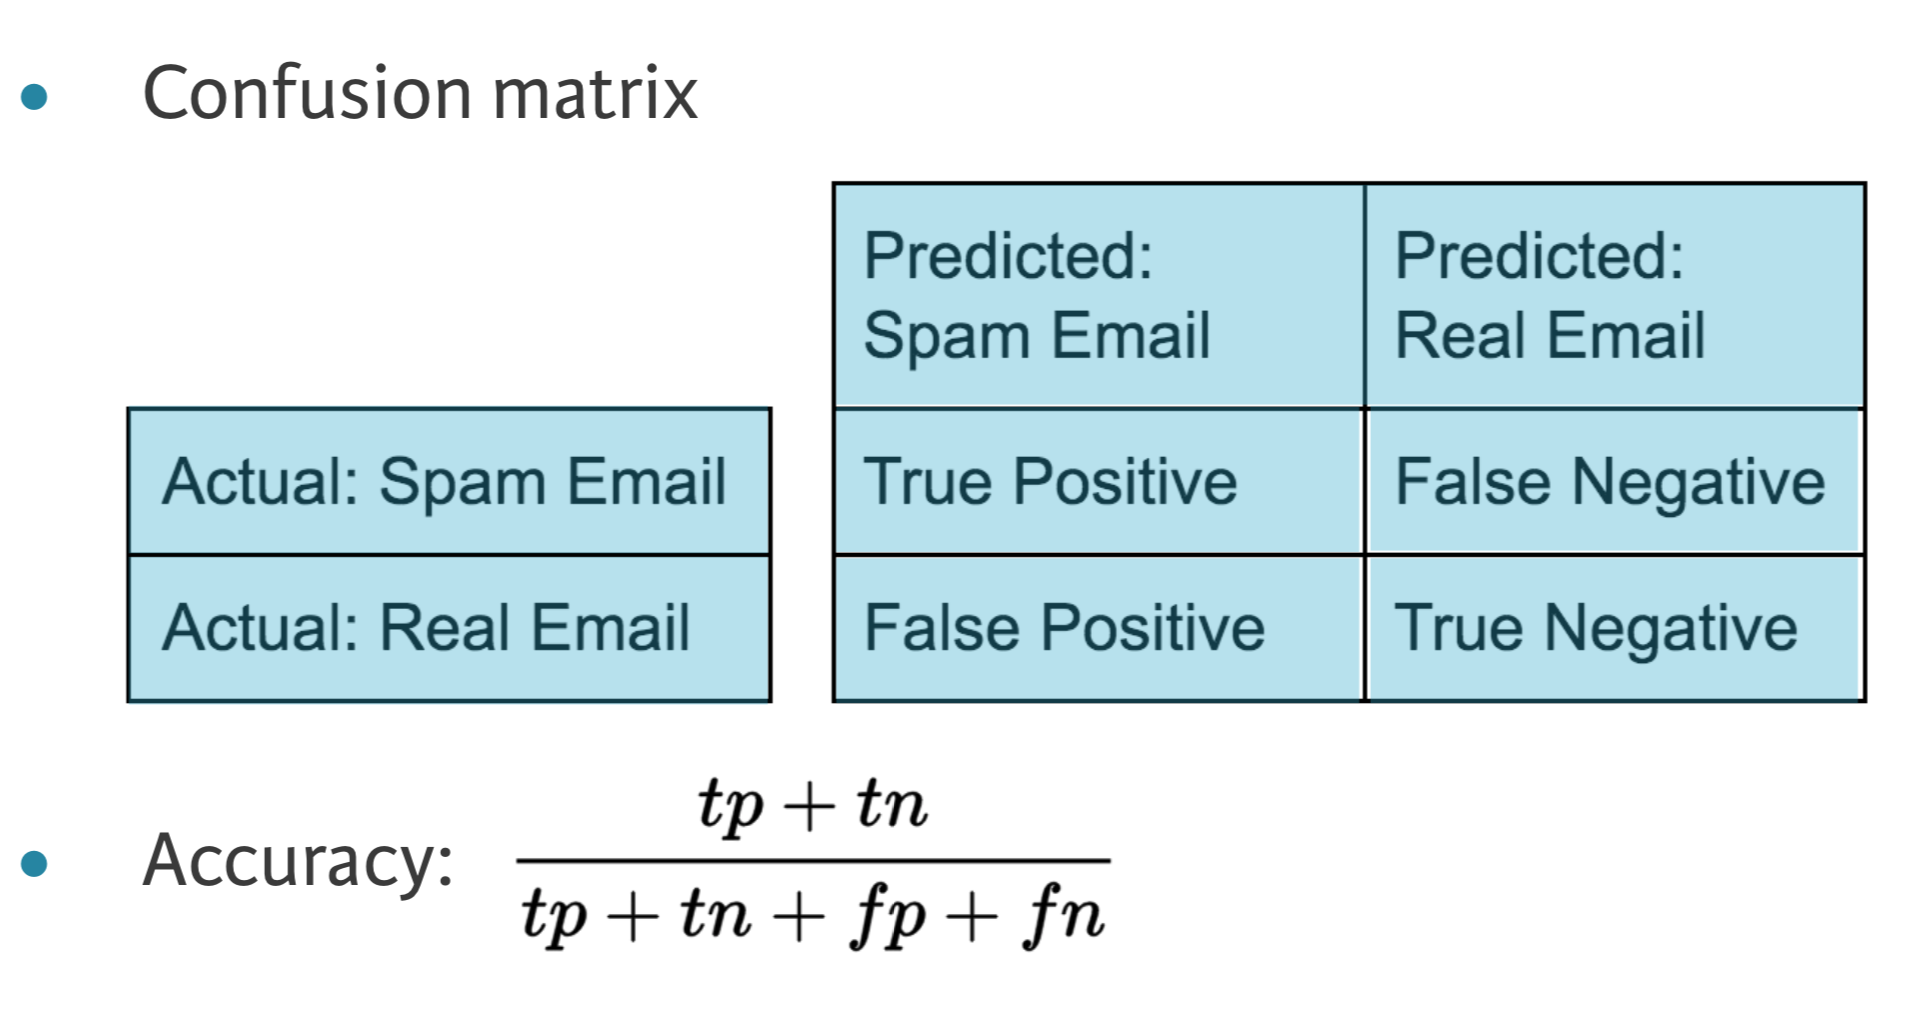

# Métricas da Matriz de Confusão

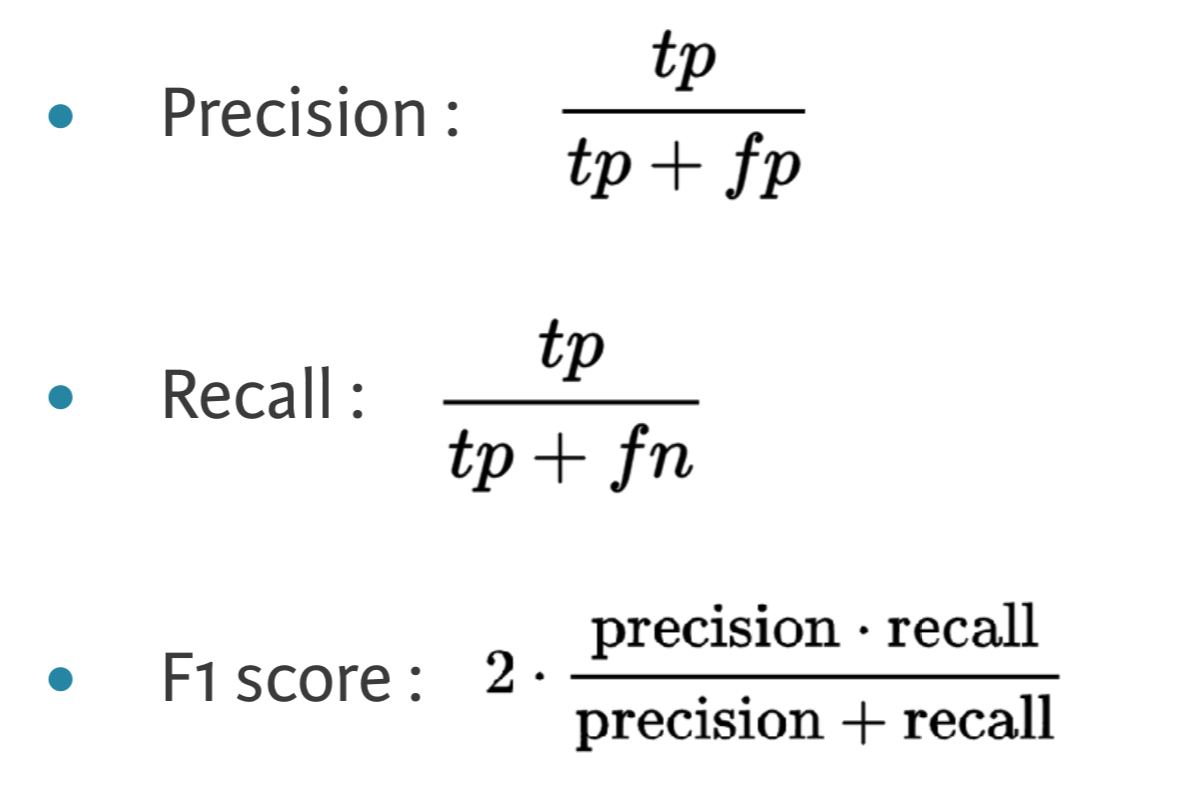

# Precisiom Alta: Não muitos emails reais classificados como spam

# Recall Alta: Predisse a maioria dos spam corretamente

In [3]:
import pandas as pd
df_diabetes = pd.read_csv('/Users/marcosdeoliveira/diabetes.csv')

In [5]:
df_diabetes.head() #Banco com informação sobre pacientes femininas que tem diabetes... predizer se novos
                   #teriam diabetes 

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
X = df_diabetes.drop('diabetes', axis=1).values
y = df_diabetes['diabetes'].values

In [8]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [18]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [22]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
knn = KNeighborsClassifier(n_neighbors=6)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))


[[176  30]
 [ 56  46]]


# 0 o paciente não tem diabetes, 1 o paciente tem diabetes

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       206
           1       0.61      0.45      0.52       102

    accuracy                           0.72       308
   macro avg       0.68      0.65      0.66       308
weighted avg       0.71      0.72      0.71       308



# Logistic Regression para Classificação Binária
- Logistic Regression dá como saída estatísticas
- Se a probabilidade 'p' é maior que 0.5:
    - O dado é rotulado como 1
- Se a probabilidade 'p' é menor que 0.5:
    - O dado é rotulado como 0
    
# Fronteira de decisão linear

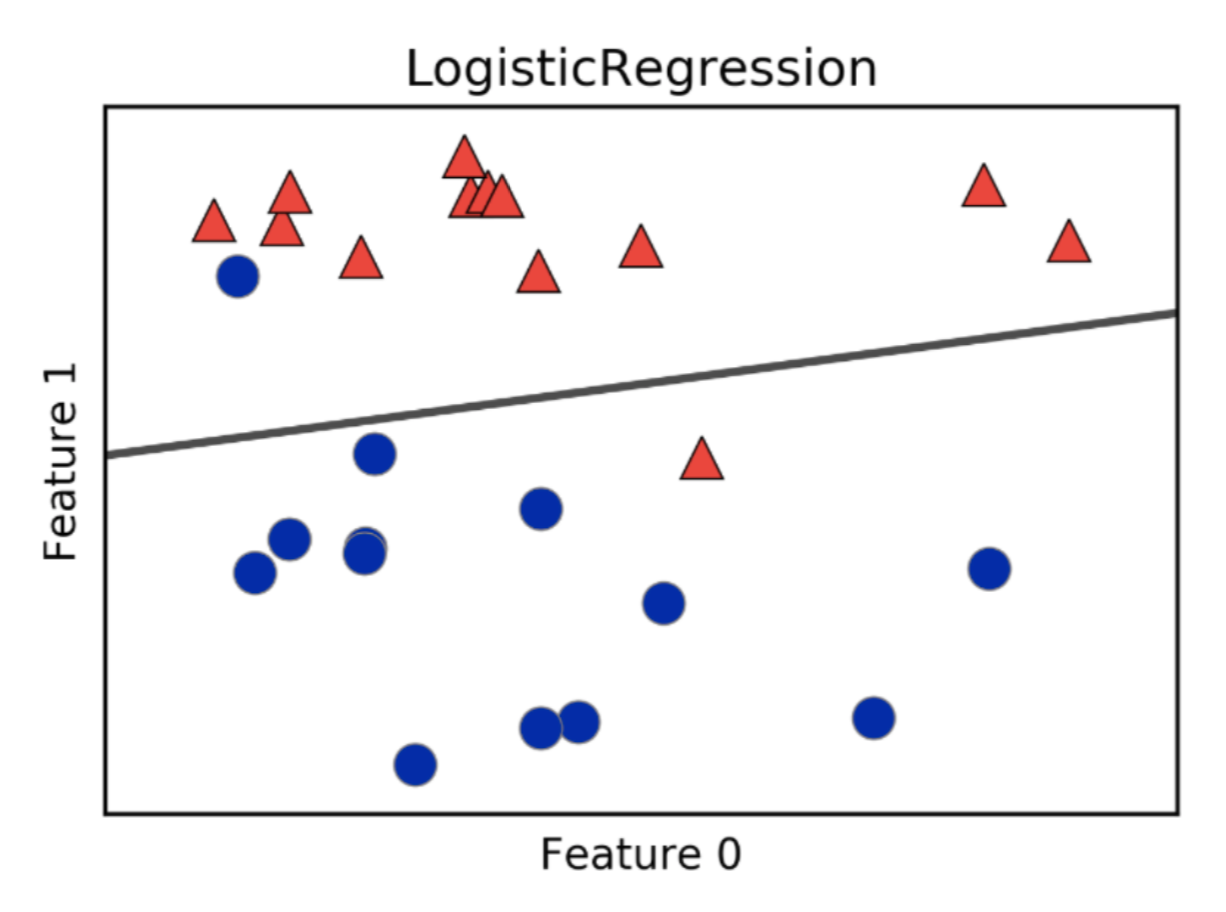

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[174  32]
 [ 36  66]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       206
           1       0.67      0.65      0.66       102

    accuracy                           0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308



# Thresholds (limiar) de probabilidade
- Por padrão, o threshold é 0.5
- Não é específico para Logistic Regression
    - k-NN classifier também tem thresholds
- E se variarmos o thrashhold?

# A curva ROC (Receiver Operator Caracteristic Curve)

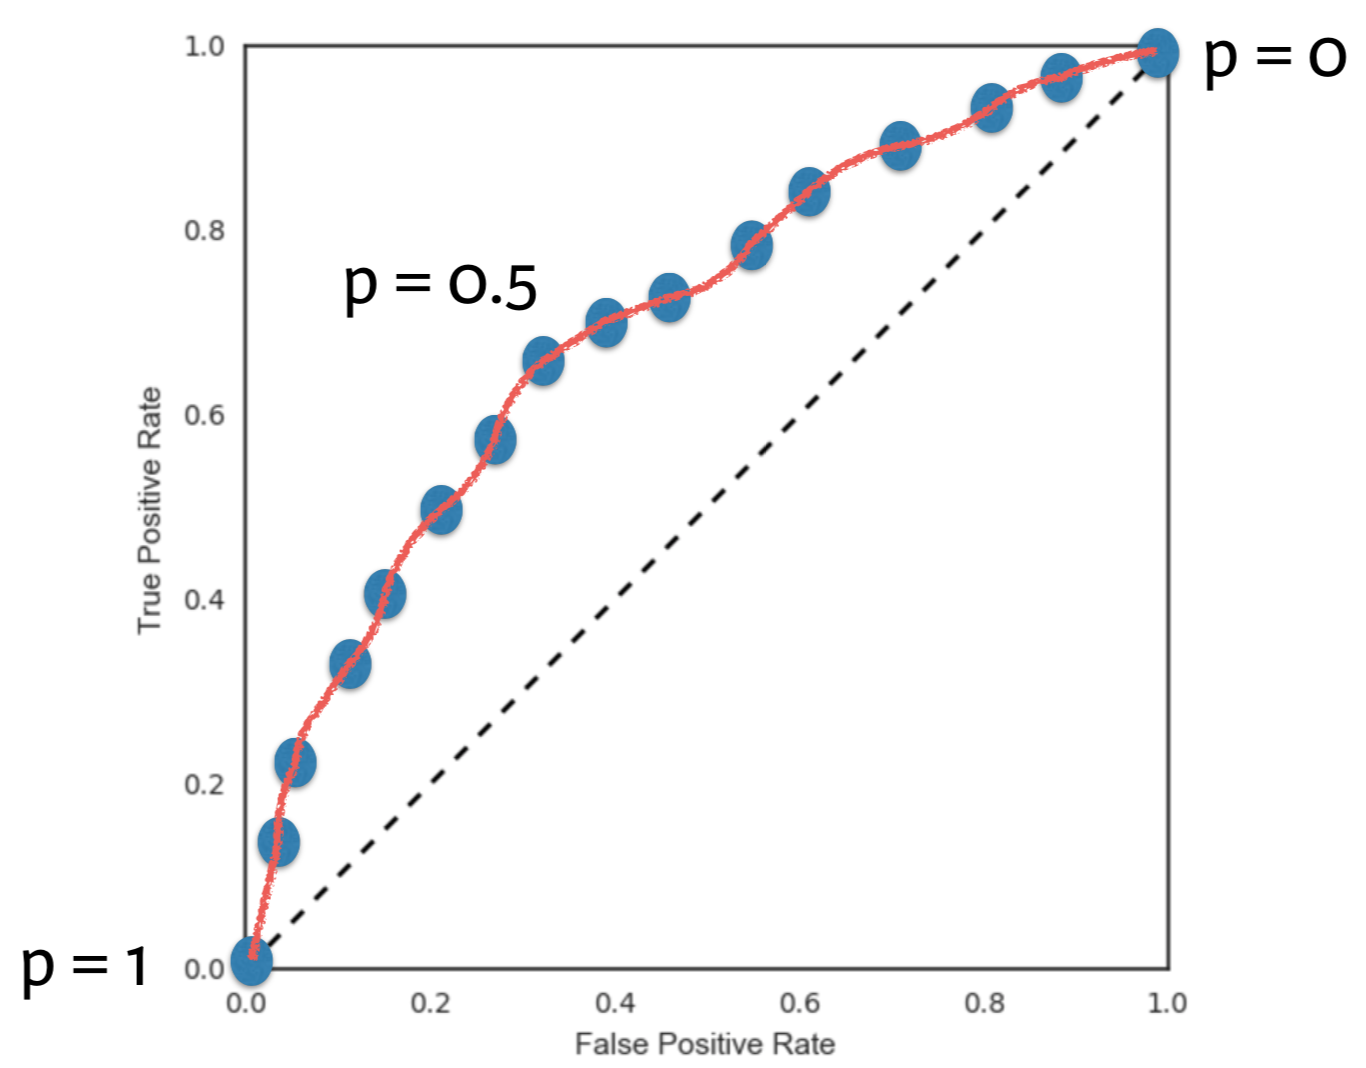

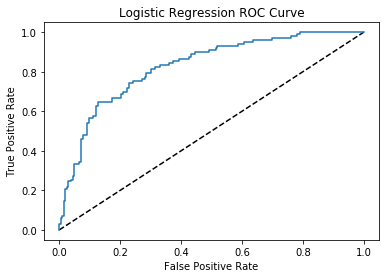

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
y_pred_prob = logreg.predict_proba(X_test)[:,1] #retorna a probabilidade de de um instancia ser classificada em uma classe
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()           

In [38]:
y_pred_prob

array([0.38240755, 0.2233474 , 0.21798872, 0.24851963, 0.45619241,
       0.46471041, 0.06923817, 0.70211319, 0.51328131, 0.67411936,
       0.33366807, 0.73507061, 0.48663175, 0.32691618, 0.14905117,
       0.40807945, 0.1873272 , 0.15591448, 0.87305509, 0.51993971,
       0.29326268, 0.13008273, 0.48768636, 0.17363189, 0.5486833 ,
       0.74039449, 0.21792661, 0.0853005 , 0.27221656, 0.19066419,
       0.73231756, 0.74429761, 0.69555655, 0.82620798, 0.47626094,
       0.62088961, 0.78990465, 0.20496326, 0.50744855, 0.77527803,
       0.15996191, 0.54866331, 0.47686086, 0.44224248, 0.08126957,
       0.48440283, 0.51588935, 0.2611673 , 0.40254111, 0.85334364,
       0.11990209, 0.57287248, 0.75692681, 0.31274834, 0.21422558,
       0.10103482, 0.69395045, 0.06503518, 0.38366005, 0.70374985,
       0.61419746, 0.34330858, 0.32197844, 0.40993671, 0.1311199 ,
       0.42113671, 0.11711772, 0.58437304, 0.08933068, 0.71812515,
       0.66847211, 0.1208685 , 0.30091608, 0.1527934 , 0.20316

# Quanto maior a área abaixo da curva ROC melhor o modelo!

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred_prob)

0.8268608414239482

# Usando Cross-Validation

In [31]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')
print(cv_scores)

[0.7987037  0.80777778 0.81944444 0.86622642 0.85037736]


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

# Ajuste (tuning) dos Hyperparameters 
- Linear Regression: Escolhendo parâmetros
- Ridge/lasso Regression: Escolhendo alpha
- k-NN: Escolhendo n_neighbors
- Parâmetros como alpha e k são os Hyperparameters
- Hyperparameters não podes ser aprendidos ajustando (fitting) o modelo!

# Escolhendo o Hyperparameter correto
- Tentar um certa quantidade de valores diferentes para os Hyperparametros
- Fit todos eles separadamente
- Ver o quão bom são os resultados usando eles
- Escolher o melhor
- Essencial utilizar cross-validation

# Grid search cross-validation

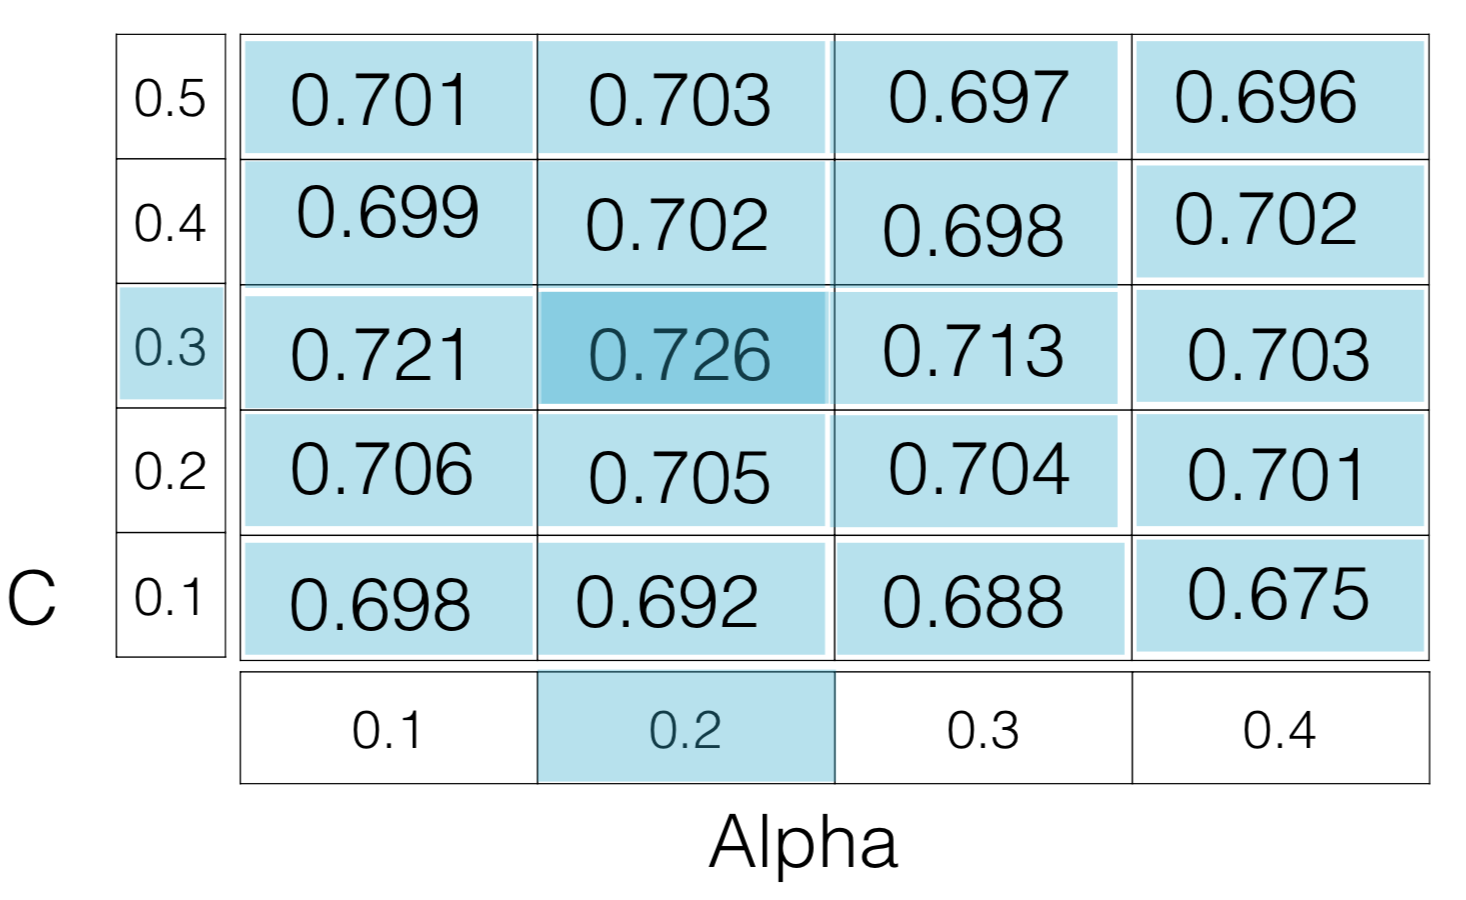

In [35]:
import numpy as np
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 14}
0.7578125


# Separe um conjunto de dados apenas para teste!
- Necessário saber como o modelo se sai com instancias desconhecidas!
- Sendo assim, usar todo o dado para cross-validation não é o ideal
- Divida os dados em training e hold-out set no início
- Execute a grid search cross-validation no training set
- Escolha os melhores hyperparameters e avalie o modelo no hold-out set

In [37]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
param_grid = {'n_neighbors': np.arange(1, 50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

y_pred = knn_cv.predict(X_test)
print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))


{'n_neighbors': 10}
0.7392923649906891
[[127  24]
 [ 41  39]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       151
           1       0.62      0.49      0.55        80

    accuracy                           0.72       231
   macro avg       0.69      0.66      0.67       231
weighted avg       0.71      0.72      0.71       231



/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
